In [1]:



from data_util.fetch_update_data_by_xlsx import read_ths_xlsx_to_df
import pandas as pd

df = pd.read_csv('../temp/Table1222.xls', encoding='gbk', sep='\t')
print(df.columns)


Index(['.', '代码', '    名称', '..1', '涨幅', '现价', '振幅', '涨跌', '连续涨停天数[20211222]',
       '涨停原因类别[20211222]', '涨速', '所属行业', '总金额', '总市值', '总手', '换手', '实体涨幅',
       'TTM市盈率', '现均差%', '委比%', '流通市值', '流通比例', '内盘', '外盘', '内外比', '利空', '利好',
       '细分行业', '主力净量', '量比', '净利润?', '市净率', '每股盈利', '昨收', '开盘', '开盘涨幅', '最高',
       '最低', '5日涨幅', '10日涨幅', '20日涨幅', '年初至今', '买量', '卖量', '笔数', '贡献度', '机构动向',
       '异动类型', '总股本', '流通股本', '利润总额', '净利润增长率', '每股净资产', '金叉个数',
       '流通股合计占总股本比例%[20211221]', '首次涨停时间[20211222]', '最终涨停时间[20211222]',
       '涨停封单额[20211222]', '涨停封成比%[20211222]', '涨停开板次数[20211222]',
       '流通市值[20211222]', 'Unnamed: 61'],
      dtype='object')


In [2]:
df = df[['代码', '开盘', '最高', '最低', '现价', '昨收', '总金额', '总市值', '总手', '换手', '涨幅', '所属行业']]

# df = df[df['总市值']>0]
cols = ['开盘', '最高', '最低', '现价', '昨收', '总金额', '换手', '涨幅', '总手', '总市值']

df['换手'] = df['换手'].str.rstrip('%')
df['涨幅'] = df['涨幅'].str.rstrip('%')


for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    pass


print(df.dtypes)
print(df.head(11))


代码       object
开盘      float64
最高      float64
最低      float64
现价      float64
昨收      float64
总金额     float64
总市值     float64
总手      float64
换手      float64
涨幅      float64
所属行业     object
dtype: object
          代码     开盘     最高     最低     现价     昨收           总金额           总市值  \
0   SZ000001  17.62  17.64  17.30  17.39  17.59  1.701773e+09  3.374689e+11   
1   SZ000002  20.29  20.33  19.80  19.86  20.31  1.921113e+09  2.308801e+11   
2   SZ000004  19.39  19.87  19.30  19.53  19.17  8.798084e+07  3.046739e+09   
3   SZ000005   2.28   2.31   2.25   2.29   2.27  3.009576e+07  2.424049e+09   
4   SZ000006   4.58   4.71   4.49   4.51   4.72  1.764988e+08  6.088478e+09   
5   SZ000007   5.70   5.74   5.60   5.62   5.62  3.666503e+07  1.947038e+09   
6   SZ000008   2.98   2.98   2.81   2.98   2.71  7.493827e+08  8.286770e+09   
7   SZ000009  15.04  15.27  14.92  15.10  15.03  7.539477e+08  3.894613e+10   
8   SZ000010   3.97   3.99   3.86   3.90   3.95  5.635150e+07  3.197433e+09   
9   

In [3]:

df = df[df['总市值'] > 0]

df['总市值'] = df['总市值'] / 1e8
print(df)

            代码      开盘      最高      最低      现价      昨收           总金额  \
0     SZ000001   17.62   17.64   17.30   17.39   17.59  1.701773e+09   
1     SZ000002   20.29   20.33   19.80   19.86   20.31  1.921113e+09   
2     SZ000004   19.39   19.87   19.30   19.53   19.17  8.798084e+07   
3     SZ000005    2.28    2.31    2.25    2.29    2.27  3.009576e+07   
4     SZ000006    4.58    4.71    4.49    4.51    4.72  1.764988e+08   
...        ...     ...     ...     ...     ...     ...           ...   
4605  SH688799   38.39   38.74   38.08   38.38   38.28  1.034884e+07   
4606  SH688800  138.74  149.90  137.31  138.20  141.50  1.322252e+08   
4607  SH688819   43.15   43.28   42.72   42.97   42.97  7.321351e+07   
4608  SH688981   53.16   53.25   52.96   53.02   53.08  8.238523e+08   
4609  SH689009   63.40   69.00   63.40   67.04   63.38  4.804221e+08   

              总市值          总手    换手    涨幅    所属行业  
0     3374.689200  97692775.0  0.50 -1.14      银行  
1     2308.801100  96198591.0  

In [4]:
inds = df['所属行业'].drop_duplicates()
print(inds)


0           银行
1        房地产开发
2        计算机应用
3           环保
5           零售
         ...  
1022      农业服务
1050     电子化学品
1210      专业服务
1308    其他社会服务
3904     非金属材料
Name: 所属行业, Length: 78, dtype: object


In [5]:
indmv = []

for ind in inds:
    dfind = df[df['所属行业'] == ind]

    mv = sum(dfind['总市值'])
    indmv.append((ind, mv))

print(indmv)


[('银行', 100433.95891800002), ('房地产开发', 17868.113999999998), ('计算机应用', 28187.161752999975), ('环保', 8663.120416), ('零售', 10290.313709), ('非汽车交运', 6450.5072930000015), ('电力设备', 83214.44159700001), ('建筑装饰', 18154.901401600004), ('建筑材料', 13581.981466999996), ('黑色家电', 1350.231945), ('农产品加工', 7576.906688500001), ('光学光电子', 12751.365313), ('消费电子', 18603.8541907), ('汽车服务', 1156.6263339999998), ('家用轻工', 8142.994610999998), ('电力', 28086.177693), ('医药商业', 3332.3680400000003), ('汽车零部件', 18214.453531000006), ('通信设备', 8936.385882), ('综合', 1285.5072963), ('通用设备', 9146.134991999998), ('保险及其他', 5321.134633999997), ('石油加工贸易', 18983.507582), ('工业金属', 12307.580781), ('其他电子', 2604.1532859999993), ('计算机设备', 11461.607356999999), ('港口航运', 9288.15942), ('机场航运', 6084.421767999999), ('医疗服务', 14920.394197), ('贸易', 1390.362622), ('化学制药', 19009.430519200007), ('传媒', 15068.377537799997), ('专用设备', 16566.6681804), ('证券', 36786.964926), ('化工合成材料', 9353.777529599996), ('白色家电', 12544.808445000002), ('生物制品', 14144.777492000

In [6]:
indmv.sort(key=lambda x: x[1], reverse=True)
print(indmv)


[('银行', 100433.95891800002), ('电力设备', 83214.44159700001), ('饮料制造', 56664.147913), ('半导体及元件', 41139.14468000001), ('证券', 36786.964926), ('计算机应用', 28187.161752999975), ('电力', 28086.177693), ('化学制品', 25524.911799999998), ('国防军工', 25481.026631000008), ('保险', 23808.964227), ('汽车整车', 22384.467191), ('医疗器械', 19144.90245), ('化学制药', 19009.430519200007), ('石油加工贸易', 18983.507582), ('消费电子', 18603.8541907), ('汽车零部件', 18214.453531000006), ('建筑装饰', 18154.901401600004), ('房地产开发', 17868.113999999998), ('专用设备', 16566.6681804), ('食品加工制造', 15948.495442), ('传媒', 15068.377537799997), ('医疗服务', 14920.394197), ('生物制品', 14144.777492000001), ('建筑材料', 13581.981466999996), ('小金属', 13287.495838000003), ('光学光电子', 12751.365313), ('煤炭开采加工', 12693.718061), ('白色家电', 12544.808445000002), ('工业金属', 12307.580781), ('钢铁', 11995.752445999999), ('中药', 11484.592696), ('计算机设备', 11461.607356999999), ('零售', 10290.313709), ('化工合成材料', 9353.777529599996), ('港口航运', 9288.15942), ('化学原料', 9233.395654), ('通用设备', 9146.134991999998), ('通信设

In [7]:
indcount = len(indmv)
print(indcount)

indstockcount = {}
inddfs = {}
for ind in indmv:
    inddf = df[df['所属行业'] == ind[0]]
    indstockcount[ind[0]] = inddf.shape[0]
    inddfs[ind[0]] = inddf

print(indstockcount)


78
{'银行': 41, '电力设备': 281, '饮料制造': 46, '半导体及元件': 129, '证券': 48, '计算机应用': 216, '电力': 93, '化学制品': 187, '国防军工': 116, '保险': 7, '汽车整车': 23, '医疗器械': 102, '化学制药': 133, '石油加工贸易': 24, '消费电子': 81, '汽车零部件': 181, '建筑装饰': 139, '房地产开发': 111, '专用设备': 173, '食品加工制造': 71, '传媒': 138, '医疗服务': 40, '生物制品': 41, '建筑材料': 77, '小金属': 35, '光学光电子': 95, '煤炭开采加工': 34, '白色家电': 32, '工业金属': 61, '钢铁': 44, '中药': 71, '计算机设备': 69, '零售': 77, '化工合成材料': 100, '港口航运': 31, '化学原料': 53, '通用设备': 140, '通信设备': 77, '物流': 45, '环保': 120, '自动化设备': 63, '家用轻工': 90, '农产品加工': 33, '公路铁路运输': 35, '通信服务': 31, '非汽车交运': 43, '机场航运': 12, '养殖业': 27, '保险及其他': 33, '美容护理': 29, '服装家纺': 62, '医药商业': 28, '小家电': 20, '油气开采及服务': 20, '纺织制造': 34, '其他电子': 32, '包装印刷': 40, '金属新材料': 23, '燃气': 27, '贵金属': 10, '电子化学品': 23, '仪器仪表': 39, '专业服务': 22, '种植业与林业': 21, '造纸': 22, '互联网电商': 15, '贸易': 19, '黑色家电': 11, '教育': 21, '综合': 32, '汽车服务': 14, '酒店及餐饮': 11, '景点及旅游': 22, '农业服务': 13, '厨卫电器': 9, '非金属材料': 6, '房地产服务': 8, '其他社会服务': 3}


In [8]:
import math

sumindstockcount = sum(indstockcount.values())
maxindstockcount = max(indstockcount.values())
industrycount = len(indmv)
print('sumindstockcount', sumindstockcount)
print('maxindstockcount', maxindstockcount)
print('industrycount', industrycount)

sumindstockcount 4585
maxindstockcount 281
industrycount 78


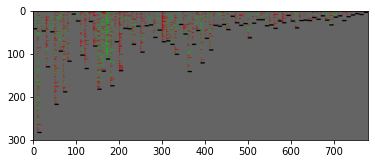

In [9]:
from PIL import Image, ImageDraw

width = industrycount * 10
height = maxindstockcount + 20

img = Image.new('RGB', size=(width, height), color=(100,100,100))
px = img.load()


for ind in indmv:
    col = indmv.index(ind)

    industry = ind[0]
    inddf = inddfs[industry]
    if not inddf.empty:
        inddf.sort_values(by='总市值', ascending=False)
        for row in range(inddf.shape[0]):
            pct = inddf['涨幅'].values[row]
            c = (200,0,0) if pct > 0 else (0,200,0)
            #print(row, col, pct, c)
            if pct > 9.9 or pct < -9.9 or math.isnan(pct):
                for i in range(10):
                    px[col * 10 + i, row] = c
                pass
            else:
                pct = int(pct)
                for i in range(abs(pct)):
                    px[col * 10 + i, row] = c
            pass
        for i in range(10):
            px[col * 10 + i, inddf.shape[0]+1] = (0,0,0)
            px[col * 10 + i, inddf.shape[0]+2] = (0,0,0)
            px[col * 10 + i, inddf.shape[0]+3] = (0,0,0)
img.save('test.bmp')
# img.show()
import matplotlib.pyplot as plt

plt.imshow(img)


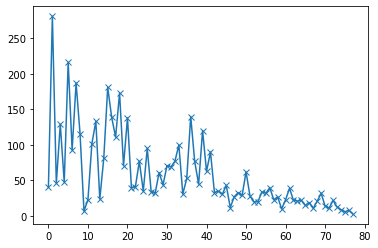

In [10]:
import matplotlib.pyplot as plt



plt.plot([inddf.shape[0] for inddf in inddfs.values()], '-x')
plt.show()







